### The Simulator supports batches and is extremely efficient to tensor-based algorithm.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from deepqis.utils import Purity_Measure as pm
from deepqis.utils import Concurrence_Measure as cm
from deepqis.utils import Fidelity_Measure as fm
from deepqis.utils import Rank_Measure as rk
from deepqis.Simulator import Distributions, Measurements
import tensorflow as tf

### Performance can be accelerated with GPUs. For an example, GPU seems to be approx 3.5 times faster than on CPU.

#### GPU -- RTX 3080

(300000, 4, 4)
|GPU (s):  0.08845639228820801


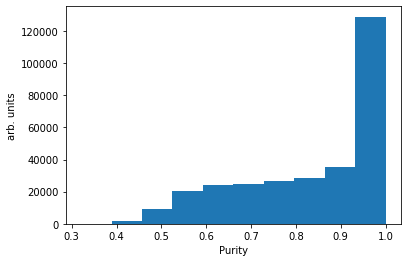

In [52]:
# MA-Symmetric-Gamma (This is purely tensor-based calculation)
import time
start = time.time()
with tf.device('/GPU:0'):
    ma_symmetric_gamma = Distributions.MaiAlquierDist_Gamma(qs=tf.constant(2), alpha=0.1)
    gamma_states = ma_symmetric_gamma.sample_dm(tf.constant(300_000))
print(gamma_states.shape)
end = time.time()
print('|GPU (s): ', end-start)
pur = pm.purity(gamma_states.numpy())
plt.hist(pur)
plt.xlabel('Purity')
plt.ylabel('arb. units')
plt.show()

#### CPU -- Intel 11th Gen I-7

(300000, 4, 4)
|CPU (s): 0.2900700569152832


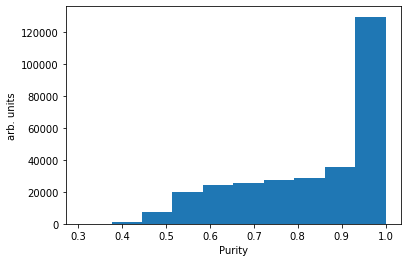

In [53]:
# MA-Symmetric-Gamma (This is purely tensor-based calculation)
import time
start = time.time()
with tf.device('/CPU:0'):
    ma_symmetric_gamma = Distributions.MaiAlquierDist_Gamma(qs=tf.constant(2), alpha=0.1)
    gamma_states = ma_symmetric_gamma.sample_dm(tf.constant(300_000))
print(gamma_states.shape)
end = time.time()
print('|CPU (s):', end-start)
pur = pm.purity(gamma_states.numpy())
plt.hist(pur)
plt.xlabel('Purity')
plt.ylabel('arb. units')
plt.show()

##### We first generate 100 random states for two-qubit case

In [54]:
# Haar-random pure states
rho_haar = Distributions.Haar_State(qs=2).sample_dm(n_size=100) # qs: number of qubits and n_size: number of states to be sampled

# Hilbert-Schmidt
hs = Distributions.Hilbert_Schmidt(qs=2).sample_dm(n_size=100)

# Bures
bures = Distributions.Bures(qs=2).sample_dm(n_size=100)

# HS-Haar
hs_haar = Distributions.HS_Haar(qs=2).sample_dm(n_size=100)

# MA-Symmetric
ma_symmetric = Distributions.MaiAlquierDist_Symmetric(qs=2, alpha=0.1).sample_dm(n_size=100)

# MA-Asymmetric
ma_asymmetric = Distributions.MaiAlquierDist_Asymmetric(qs=2, alpha=[0.1, 0.2, 0.4, 0.5]).sample_dm(n_size=100)


##### Find purity of states from all distributions and plot them

In [55]:
print ('|Shape: ', rho_haar.shape)

# test the purity of the sampled states
purity_haar = pm.purity(rho_haar)
print('|Purity: ', purity_haar)

# test the rank
rank_haar = rk.rank(rho_haar)
print('|rank: ', rank_haar)

|Shape:  (100, 4, 4)
|Purity:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
|rank:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
